In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import axis3d

plt.rcParams['figure.figsize'] = (16, 12)

In [2]:
transact = pd.read_csv('QVI_transaction_data.xlsx; filename*.csv', parse_dates=['DATE'])

In [3]:
transact

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [4]:
cust = pd.read_csv('QVI_purchase_behaviour.csv; filename*.csv')

In [5]:
cust

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream
...,...,...,...
72632,2370651,MIDAGE SINGLES/COUPLES,Mainstream
72633,2370701,YOUNG FAMILIES,Mainstream
72634,2370751,YOUNG FAMILIES,Premium
72635,2370961,OLDER FAMILIES,Budget


In [6]:
transact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            264836 non-null  datetime64[ns]
 1   STORE_NBR       264836 non-null  int64         
 2   LYLTY_CARD_NBR  264836 non-null  int64         
 3   TXN_ID          264836 non-null  int64         
 4   PROD_NBR        264836 non-null  int64         
 5   PROD_NAME       264836 non-null  object        
 6   PROD_QTY        264836 non-null  int64         
 7   TOT_SALES       264836 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.2+ MB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b4a40790>,
      dtype=object)

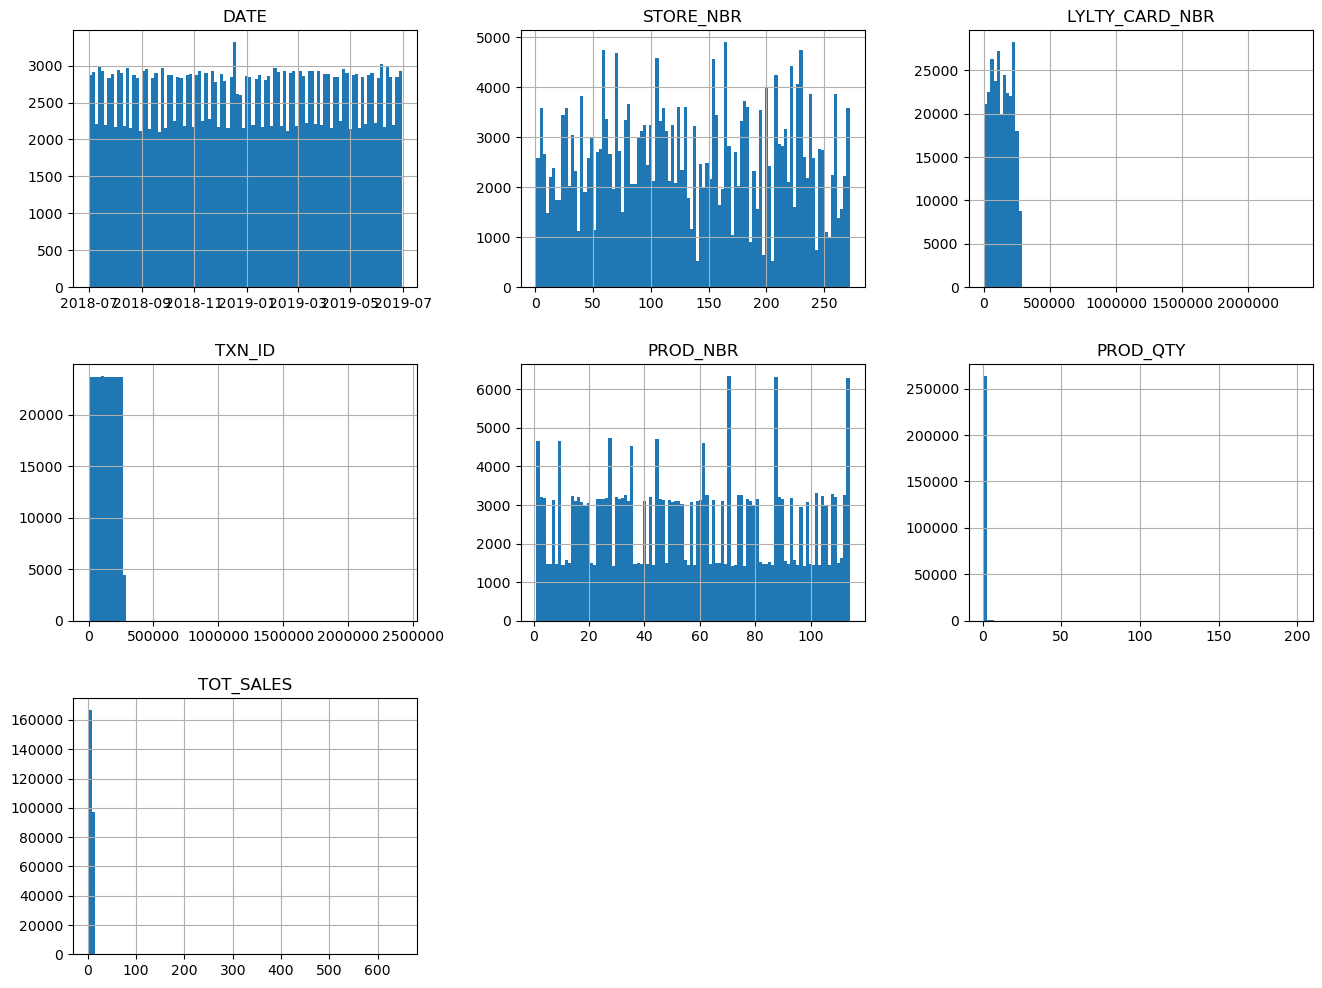

In [7]:
transact.hist(bins=100)

I see obvious outliers in the data, we can see this from boxpot figure.

In [8]:
transact.LYLTY_CARD_NBR.sort_values(ascending=False).head(50)

256040    2373711
53107     2370961
53106     2370961
227371    2370751
215522    2370701
15676     2370651
97172     2370581
97173     2370581
97171     2370361
255925    2370181
133253    2370001
96939     2330501
32030     2330461
104927    2330431
135105    2330331
244444    2330321
228460    2330311
115267    2330291
99033     2330291
99034     2330291
215358    2330271
135106    2330251
1440      2330211
80809     2330191
169026    2330171
135734    2330121
169023    2330081
172311    2330051
238493    2330041
19463     2330031
19455     2330031
105898     883791
105899     883791
105897     883791
39795      880711
39794      880711
123510     880551
39777      880171
39778      880171
191118     862501
191117     862501
191105     861961
140568     861951
123456     861921
25107      272392
25108      272392
25109      272392
25110      272392
258555     272391
28115      272390
Name: LYLTY_CARD_NBR, dtype: int64

In [9]:
transact.TXN_ID.sort_values(ascending=False).head(50)

15726     2415841
25110      270209
25109      270208
25108      270207
25107      270206
258555     270205
28115      270204
258554     270202
258553     270201
258552     270200
135104     270199
135103     270198
99032      270197
99031      270196
118034     270195
135102     270194
135101     270193
135100     270192
135099     270191
99030      270190
264835     270189
264834     270188
264833     270187
258551     270186
258550     270185
258549     270184
135098     270183
135097     270182
135096     270181
99029      270180
171771     270179
171770     270178
171769     270177
228459     270176
150305     270175
150304     270174
150303     270173
258548     270172
258547     270171
99028      270170
99027      270169
99026      270168
216896     270166
216895     270165
216894     270164
216893     270163
135095     270162
117350     270161
117349     270160
117348     270159
Name: TXN_ID, dtype: int64

In [10]:
index_outliers_TXN_ID = transact.TXN_ID.idxmax()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b27ec790>]],
      dtype=object)

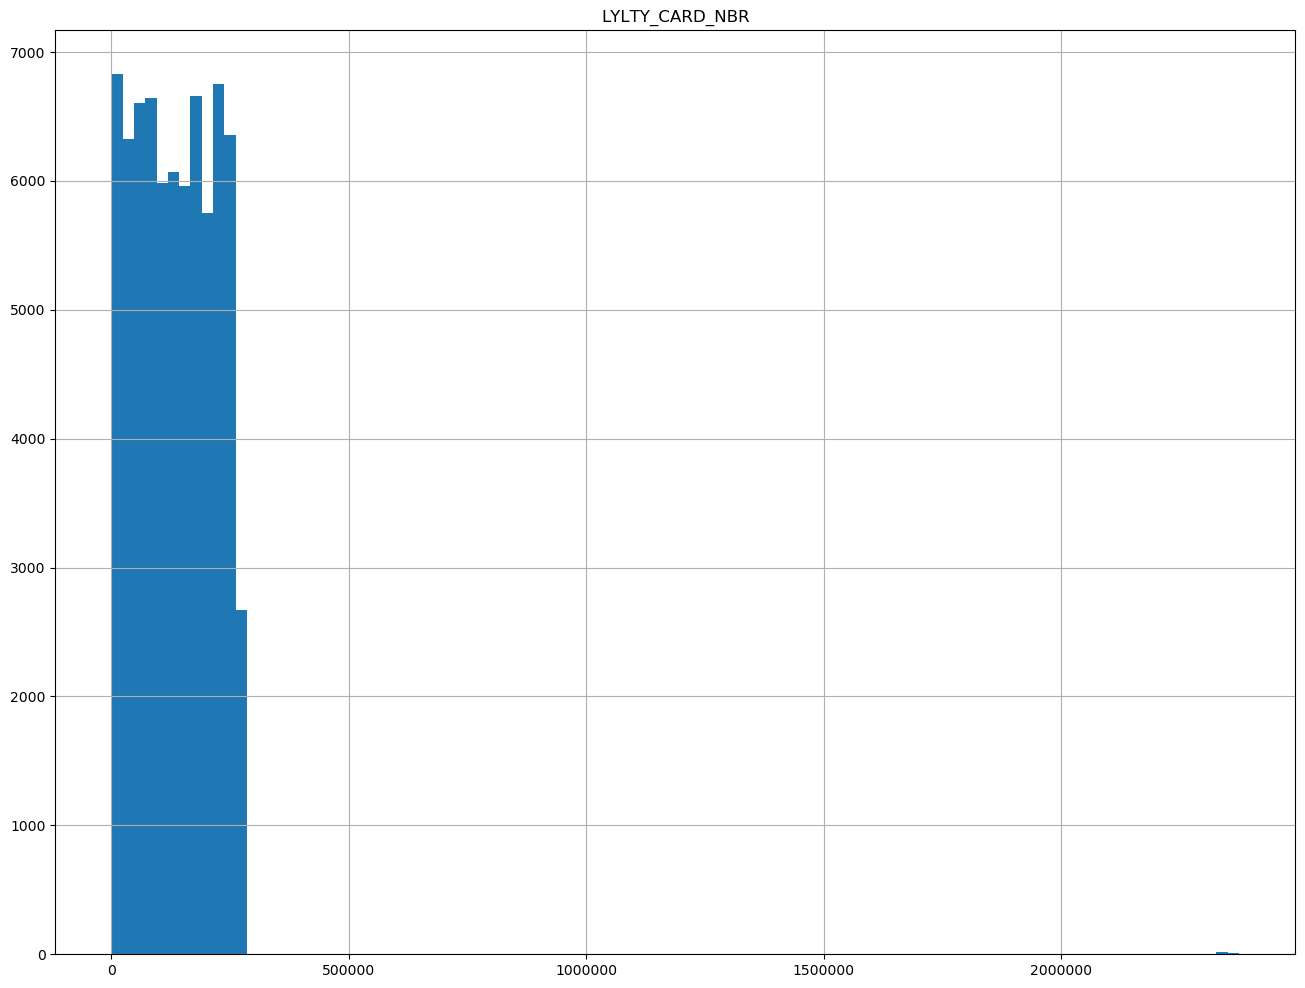

In [11]:
cust.hist(bins=100)

#### I see that numbers of outliers in Loyalty_cards match in both datasets, so they are not outliers, and should be taken into consideration.

In [12]:
transact.PROD_QTY.sort_values(ascending=False)

69762     200
69763     200
217237      5
238333      5
238471      5
         ... 
82354       1
82357       1
172438      1
82358       1
32479       1
Name: PROD_QTY, Length: 264836, dtype: int64

In [13]:
transact.PROD_QTY.value_counts()

2      236039
1       27518
5         450
3         430
4         397
200         2
Name: PROD_QTY, dtype: int64

#### Quantity of products equal 200 strongly looks like outliers, there should be number 2 as a volume.

In [14]:
transact.PROD_QTY.replace(to_replace=200, value=2,  inplace=True)

In [15]:
transact.PROD_QTY.value_counts()

2    236041
1     27518
5       450
3       430
4       397
Name: PROD_QTY, dtype: int64

In [16]:
transact.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [17]:
transact.TOT_SALES.sort_values(ascending=False)

69762     650.0
69763     650.0
69496      29.5
55558      29.5
171815     29.5
          ...  
259695      1.5
259707      1.5
197005      1.5
216449      1.5
150019      1.5
Name: TOT_SALES, Length: 264836, dtype: float64

## I see strange recordings with ID 69762 and 69763, there are mistakes in three columns. It will be better drop them, as there are sufficient number of samples in datasets.

In [18]:
transact.drop(index=[69762, 69763], axis=0, inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9b4a30af0>,
      dtype=object)

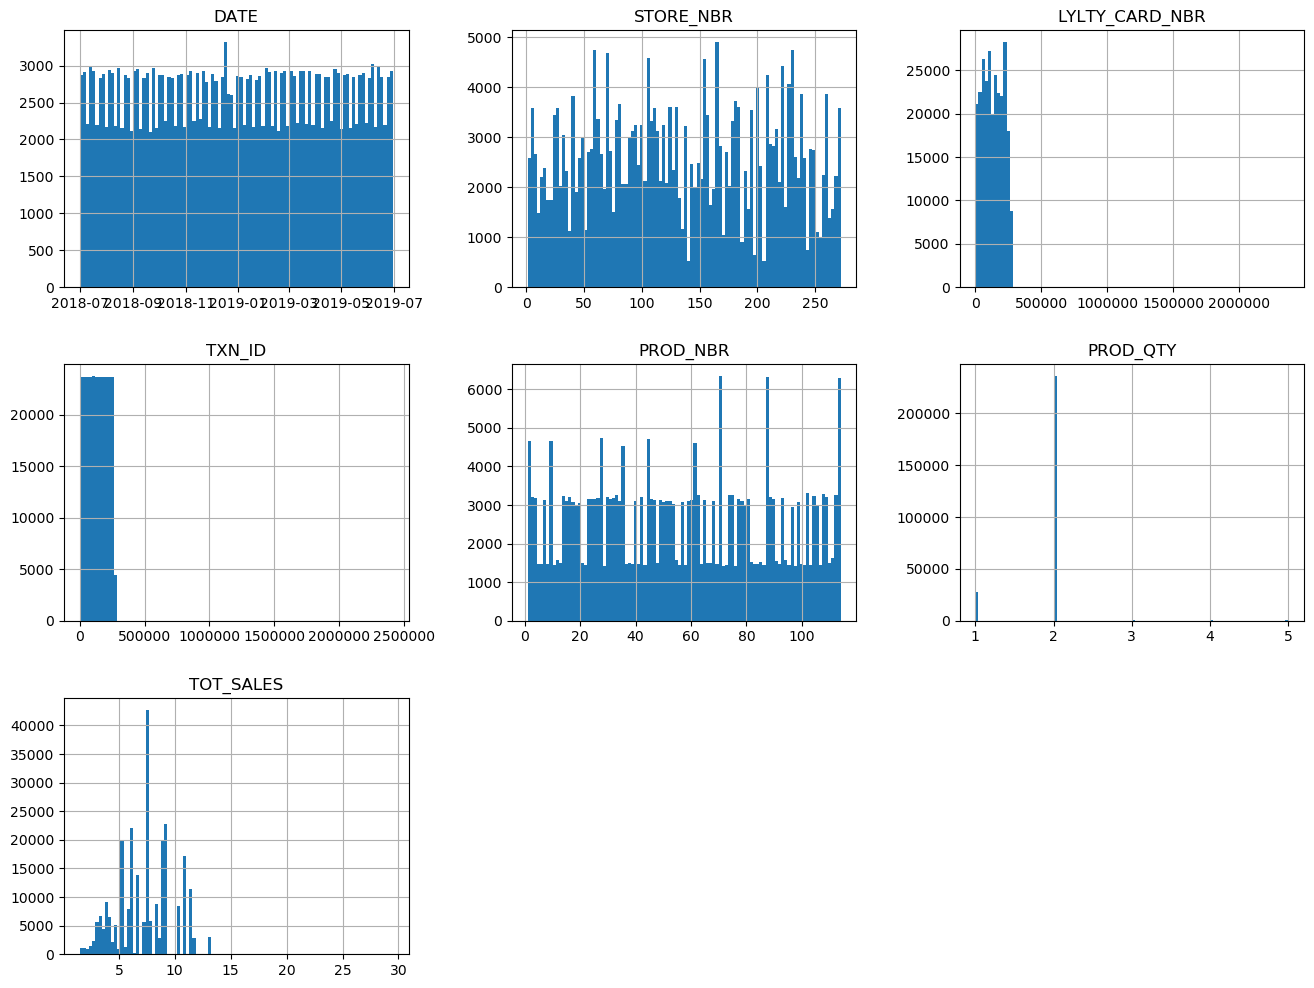

In [19]:
transact.hist(bins=100)

In [20]:
transact.columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES'],
      dtype='object')

In [21]:
renaming_columns = {'DATE': 'transaction_date',
                   'STORE_NBR': 'store_number',
                   'LYLTY_CARD_NBR': 'loyalty_card_number',
                   'TXN_ID': 'tax_ID',
                   'PROD_NBR': 'product_number',
                   'PROD_NAME': 'product_name',
                   'PROD_QTY': 'product_quantity',
                   'TOT_SALES': 'total_sales'}

In [22]:
transact.rename(renaming_columns, axis=1, inplace=True)

In [23]:
cust.columns

Index(['LYLTY_CARD_NBR', 'LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

In [24]:
renaming_columns_cust = {'LYLTY_CARD_NBR': 'loyalty_card_number',
                        'LIFESTAGE': 'lifestage',
                        'PREMIUM_CUSTOMER': 'premium_customer'}

In [25]:
cust.rename(renaming_columns_cust, axis=1, inplace=True)

In [26]:
transact

,transaction_date,store_number,loyalty_card_number,tax_ID,product_number,product_name,product_quantity,total_sales
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,2019-03-09,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,2018-08-13,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,2018-11-06,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,2018-12-27,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [27]:
(list(transact.product_name.unique()))

['Natural Chip        Compny SeaSalt175g',
 'CCs Nacho Cheese    175g',
 'Smiths Crinkle Cut  Chips Chicken 170g',
 'Smiths Chip Thinly  S/Cream&Onion 175g',
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
 'Old El Paso Salsa   Dip Tomato Mild 300g',
 'Smiths Crinkle Chips Salt & Vinegar 330g',
 'Grain Waves         Sweet Chilli 210g',
 'Doritos Corn Chip Mexican Jalapeno 150g',
 'Grain Waves Sour    Cream&Chives 210G',
 'Kettle Sensations   Siracha Lime 150g',
 'Twisties Cheese     270g',
 'WW Crinkle Cut      Chicken 175g',
 'Thins Chips Light&  Tangy 175g',
 'CCs Original 175g',
 'Burger Rings 220g',
 'NCC Sour Cream &    Garden Chives 175g',
 'Doritos Corn Chip Southern Chicken 150g',
 'Cheezels Cheese Box 125g',
 'Smiths Crinkle      Original 330g',
 'Infzns Crn Crnchers Tangy Gcamole 110g',
 'Kettle Sea Salt     And Vinegar 175g',
 'Smiths Chip Thinly  Cut Original 175g',
 'Kettle Original 175g',
 'Red Rock Deli Thai  Chilli&Lime 150g',
 'Pringles Sthrn FriedChicken 134g',
 'Pringle

## Let's create new columns with weights_of_chips and company_names.


In [28]:
import re
def abstract_weights(string):
    prog = re.compile('[0-9]')
    res = ''.join(prog.findall(string))
    return res
    

In [29]:
transact['weights_of_chips']  = transact.product_name.apply(abstract_weights)

In [30]:
transact.weights_of_chips.unique()

array(['175', '170', '150', '300', '330', '210', '270', '220', '125',
       '110', '134', '380', '180', '165', '135', '250', '200', '160',
       '190', '90', '70'], dtype=object)

In [31]:
def company_names(string):
    temp = string.split()
    return ' '.join(temp[0:1])

In [32]:
transact['company_name'] = transact.product_name.apply(company_names)

In [33]:
list(transact.company_name.unique())

['Natural',
 'CCs',
 'Smiths',
 'Kettle',
 'Old',
 'Grain',
 'Doritos',
 'Twisties',
 'WW',
 'Thins',
 'Burger',
 'NCC',
 'Cheezels',
 'Infzns',
 'Red',
 'Pringles',
 'Dorito',
 'Infuzions',
 'Smith',
 'GrnWves',
 'Tyrrells',
 'Cobs',
 'Woolworths',
 'French',
 'RRD',
 'Tostitos',
 'Cheetos',
 'Snbts',
 'Sunbites']

## Some of the brand names look like they are of the same brands - such as RED and RRD, which are both Red Rock Deli chips. Let's combine these together.

In [34]:
transact.company_name = transact.company_name.replace(to_replace='RRD', value='Red')
transact.company_name = transact.company_name.replace(to_replace="SNBTS", value="SUNBITES")
transact.company_name = transact.company_name.replace(to_replace="INFZNS", value="INFUZIONS")
transact.company_name = transact.company_name.replace(to_replace="WW", value="WOOLWORTHS")
transact.company_name = transact.company_name.replace(to_replace="SMITH", value="SMITHS")
transact.company_name = transact.company_name.replace(to_replace="NCC", value="NATURAL")
transact.company_name = transact.company_name.replace(to_replace="DORITO", value="DORITOS")
transact.company_name = transact.company_name.replace(to_replace="GRAIN", value="GRNWVES")

In [35]:
transact.company_name.unique()

array(['Natural', 'CCs', 'Smiths', 'Kettle', 'Old', 'Grain', 'Doritos',
       'Twisties', 'WOOLWORTHS', 'Thins', 'Burger', 'NATURAL', 'Cheezels',
       'Infzns', 'Red', 'Pringles', 'Dorito', 'Infuzions', 'Smith',
       'GrnWves', 'Tyrrells', 'Cobs', 'Woolworths', 'French', 'Tostitos',
       'Cheetos', 'Snbts', 'Sunbites'], dtype=object)

## We should use only chips product - thus separate chips from occasionally appeared there other products.¶

In [36]:
transact.head(50)

,transaction_date,store_number,loyalty_card_number,tax_ID,product_number,product_name,product_quantity,total_sales,weights_of_chips,company_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.00,175,Natural
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.30,175,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.90,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.00,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.80,150,Kettle
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.10,300,Old
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.70,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.60,210,Grain
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.90,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.20,210,Grain


In [37]:
def remove_not_useful(string):
    pat = re.compile('[0-9]{0,3}[gG]{1}')
    string1 = re.sub(pat, '', string)
    string2 = string1.replace('&', '')
    return string2.rstrip()
    

In [38]:
transact.product_name = transact.product_name.apply(remove_not_useful)

In [39]:
#let's create text file for tokenizing and frequency analysis 
text = ' '.join(transact.product_name.unique()).lower()
text

'natural chip        compny seasalt ccs nacho cheese smiths crinkle cut  chips chicken smiths chip thinly  s/creamonion kettle tortilla chpshnyjlpno chili old el paso salsa   dip tomato mild smiths crinkle chips salt  vinear rain waves         sweet chilli doritos corn chip mexican jalapeno rain waves sour    creamchives kettle sensations   siracha lime twisties cheese ww crinkle cut      chicken thins chips liht  tany ccs oriinal burer rins ncc sour cream     arden chives doritos corn chip southern chicken cheezels cheese box smiths crinkle      oriinal infzns crn crnchers tany camole kettle sea salt     and vinear smiths chip thinly  cut oriinal kettle oriinal red rock deli thai  chillilime prinles sthrn friedchicken prinles sweetspcy bbq red rock deli sr    salsa  mzzrlla thins chips         oriinl saltd red rock deli sp    salt  truffle smiths thinly       swt chlis/cream kettle chilli doritos mexicana smiths crinkle cut  french oniondip natural chipco      hony soy chckn dorito co

In [40]:
regex = re.compile('[A-Za-z]+')
def words_only(text, regex=regex):
    try:
        return " ".join(regex.findall(text))
    except:
        return ""

In [41]:
tokenized_text = words_only(text)
tokenized_text

'natural chip compny seasalt ccs nacho cheese smiths crinkle cut chips chicken smiths chip thinly s creamonion kettle tortilla chpshnyjlpno chili old el paso salsa dip tomato mild smiths crinkle chips salt vinear rain waves sweet chilli doritos corn chip mexican jalapeno rain waves sour creamchives kettle sensations siracha lime twisties cheese ww crinkle cut chicken thins chips liht tany ccs oriinal burer rins ncc sour cream arden chives doritos corn chip southern chicken cheezels cheese box smiths crinkle oriinal infzns crn crnchers tany camole kettle sea salt and vinear smiths chip thinly cut oriinal kettle oriinal red rock deli thai chillilime prinles sthrn friedchicken prinles sweetspcy bbq red rock deli sr salsa mzzrlla thins chips oriinl saltd red rock deli sp salt truffle smiths thinly swt chlis cream kettle chilli doritos mexicana smiths crinkle cut french oniondip natural chipco hony soy chckn dorito corn chp supreme twisties chicken smiths thinly cut roast chicken smiths cri

In [42]:
from nltk import FreqDist
fd = FreqDist(tokenized_text.split())
for i in fd.most_common(30):
    print(i)

('chips', 21)
('smiths', 16)
('crinkle', 14)
('cut', 14)
('kettle', 13)
('cheese', 12)
('salt', 12)
('oriinal', 10)
('chip', 9)
('salsa', 9)
('doritos', 9)
('chicken', 8)
('corn', 8)
('prinles', 8)
('rrd', 8)
('ww', 7)
('chilli', 6)
('sour', 6)
('cream', 6)
('sea', 6)
('thinly', 5)
('vinear', 5)
('thins', 5)
('crisps', 5)
('natural', 4)
('red', 4)
('rock', 4)
('deli', 4)
('supreme', 4)
('infuzions', 4)


## There are salsa products in the dataset but we are only interested in the chips category, so let's remove these.

In [43]:
def clear_salsa(string):
    if ('Salsa' or 'salsa') in string:
        return ''
    else:
        return string

In [44]:
transact.product_name = transact.product_name.apply(clear_salsa)

In [45]:
index_salsa = transact.query('product_name==""').index

In [46]:
transact_chips = transact.drop(index=index_salsa)

In [47]:
transact_chips.describe()

,store_number,loyalty_card_number,tax_ID,product_number,product_quantity,total_sales
count,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
std,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000


In [48]:
transact_chips.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 264835
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   transaction_date     246740 non-null  datetime64[ns]
 1   store_number         246740 non-null  int64         
 2   loyalty_card_number  246740 non-null  int64         
 3   tax_ID               246740 non-null  int64         
 4   product_number       246740 non-null  int64         
 5   product_name         246740 non-null  object        
 6   product_quantity     246740 non-null  int64         
 7   total_sales          246740 non-null  float64       
 8   weights_of_chips     246740 non-null  object        
 9   company_name         246740 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(3)
memory usage: 20.7+ MB


In [49]:
from IPython.display import FileLink

In [50]:
common_df = transact_chips.merge(cust, on='loyalty_card_number', how='outer')

In [51]:
common_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248090 entries, 0 to 248089
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   transaction_date     246740 non-null  datetime64[ns]
 1   store_number         246740 non-null  float64       
 2   loyalty_card_number  248090 non-null  int64         
 3   tax_ID               246740 non-null  float64       
 4   product_number       246740 non-null  float64       
 5   product_name         246740 non-null  object        
 6   product_quantity     246740 non-null  float64       
 7   total_sales          246740 non-null  float64       
 8   weights_of_chips     246740 non-null  object        
 9   company_name         246740 non-null  object        
 10  lifestage            248090 non-null  object        
 11  premium_customer     248090 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(5)
memory usage: 24.6

## After merging two tables together we see, that there is one loyalty_card_number that does not correspond with transactions data, we will remove it. As this is just one sample, we may apply dropna to whole dataset. 

In [52]:
cons_df = common_df.dropna()

In [53]:
cons_df

,transaction_date,store_number,loyalty_card_number,tax_ID,product_number,product_name,product_quantity,total_sales,weights_of_chips,company_name,lifestage,premium_customer
0,2018-10-17,1.0,1000,1.0,5.0,Natural Chip Compny SeaSalt,2.0,6.0,175,Natural,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1.0,1307,348.0,66.0,CCs Nacho Cheese,3.0,6.3,175,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1.0,1307,346.0,96.0,WW Oriinal Stacked Chips,2.0,3.8,160,WOOLWORTHS,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1.0,1307,347.0,54.0,CCs Oriinal,1.0,2.1,175,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1.0,1343,383.0,61.0,Smiths Crinkle Cut Chips Chicken,2.0,2.9,170,Smiths,MIDAGE SINGLES/COUPLES,Budget
...,...,...,...,...,...,...,...,...,...,...,...,...
246735,2019-03-09,272.0,272319,270088.0,89.0,Kettle Sweet Chilli And Sour Cream,2.0,10.8,175,Kettle,YOUNG SINGLES/COUPLES,Premium
246736,2018-08-13,272.0,272358,270154.0,74.0,Tostitos Splash Of Lime,1.0,4.4,175,Tostitos,YOUNG SINGLES/COUPLES,Premium
246737,2018-11-06,272.0,272379,270187.0,51.0,Doritos Mexicana,2.0,8.8,170,Doritos,YOUNG SINGLES/COUPLES,Premium
246738,2018-12-27,272.0,272379,270188.0,42.0,Doritos Corn Chip Mexican Jalapeno,2.0,7.8,150,Doritos,YOUNG SINGLES/COUPLES,Premium


In [54]:
cons_df['day_of_week'] = cons_df.transaction_date.dt.day_name()

/tmp/ipykernel_6329/3752925889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cons_df['day_of_week'] = cons_df.transaction_date.dt.day_name()


## Now, let's look at the number of transaction lines over time to see if there are any obvious data issues such as missing data.

There's only 364 rows, meaning only 364 dates which indicates a missing date. Let's
create a sequence of dates from 1 Jul 2018 to 30 Jun 2019 and use this to create a
chart of number of transactions over time to find the missing date.

In [55]:
dates_range = pd.date_range(start='1 Jul 2018', end='30 Jun 2019')
dates_range

DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', length=365, freq='D')

In [56]:
all_dates = pd.DataFrame(data=dates_range, columns=['all_dates'])
all_dates

,all_dates
0,2018-07-01
1,2018-07-02
2,2018-07-03
3,2018-07-04
4,2018-07-05
...,...
360,2019-06-26
361,2019-06-27
362,2019-06-28
363,2019-06-29


In [57]:
with_dates = pd.concat([cons_df, all_dates], axis=1)

In [58]:
with_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246740 entries, 0 to 246739
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   transaction_date     246740 non-null  datetime64[ns]
 1   store_number         246740 non-null  float64       
 2   loyalty_card_number  246740 non-null  int64         
 3   tax_ID               246740 non-null  float64       
 4   product_number       246740 non-null  float64       
 5   product_name         246740 non-null  object        
 6   product_quantity     246740 non-null  float64       
 7   total_sales          246740 non-null  float64       
 8   weights_of_chips     246740 non-null  object        
 9   company_name         246740 non-null  object        
 10  lifestage            246740 non-null  object        
 11  premium_customer     246740 non-null  object        
 12  day_of_week          246740 non-null  object        
 13  all_dates     

In [59]:
with_dates.all_dates = with_dates.all_dates.fillna(with_dates.transaction_date)

In [60]:
sales_per_day = with_dates.groupby('all_dates', as_index=False).agg({'total_sales': 'sum'})
sales_per_day

,all_dates,total_sales
0,2018-07-01,4905.3
1,2018-07-02,4883.3
2,2018-07-03,4958.5
3,2018-07-04,4970.2
4,2018-07-05,4668.7
...,...,...
360,2019-06-26,4840.5
361,2019-06-27,4929.5
362,2019-06-28,4872.8
363,2019-06-29,5163.9


## Plot transactions over time

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


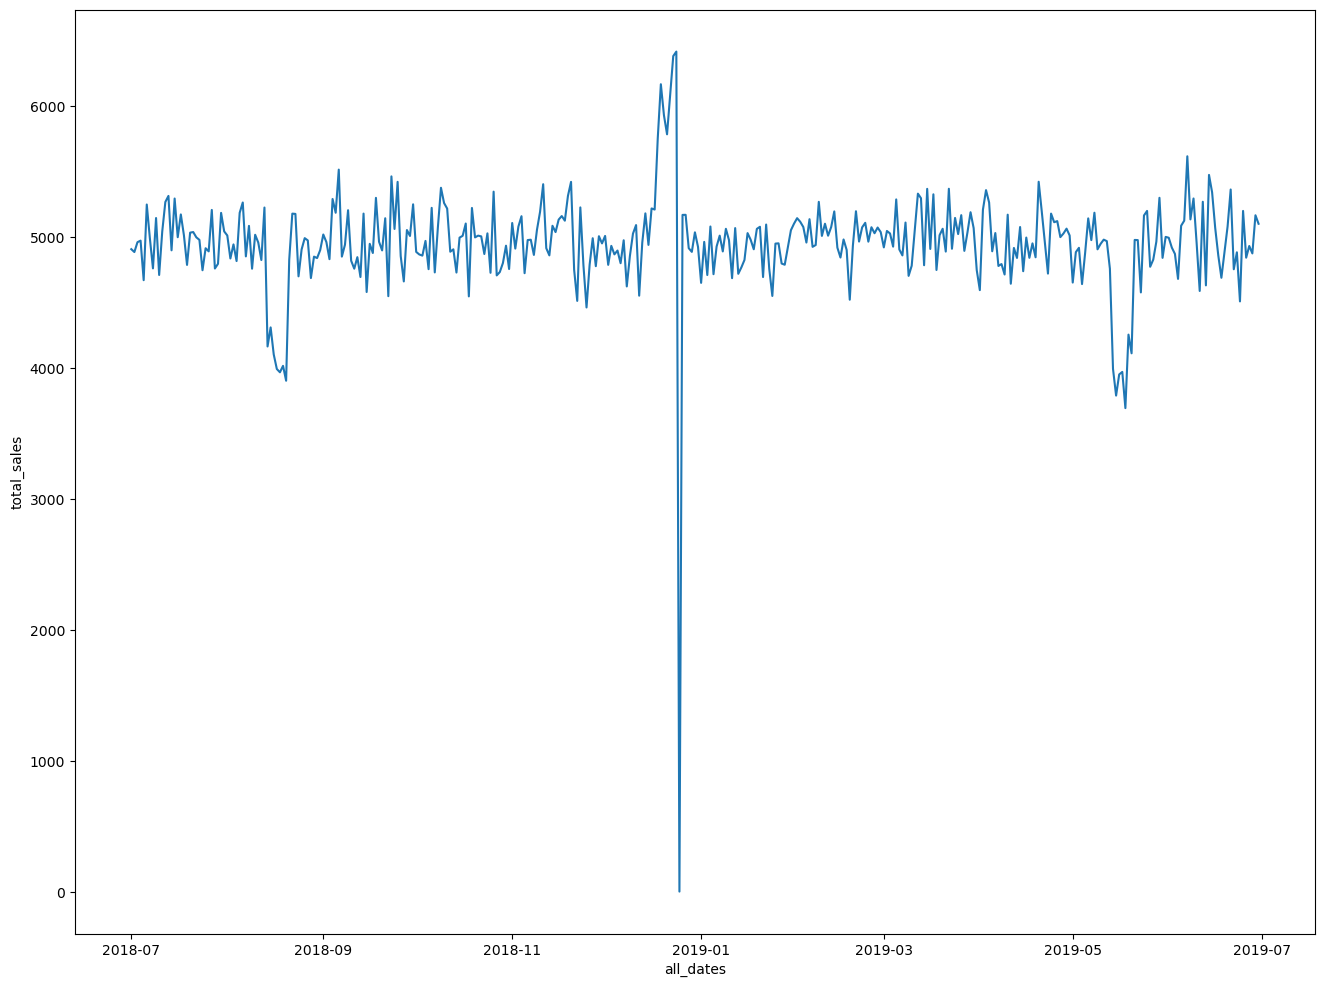

In [95]:
sns.lineplot(x="all_dates", y="total_sales",
            data=sales_per_day)
plt.savefig('sales_timeline.png')

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


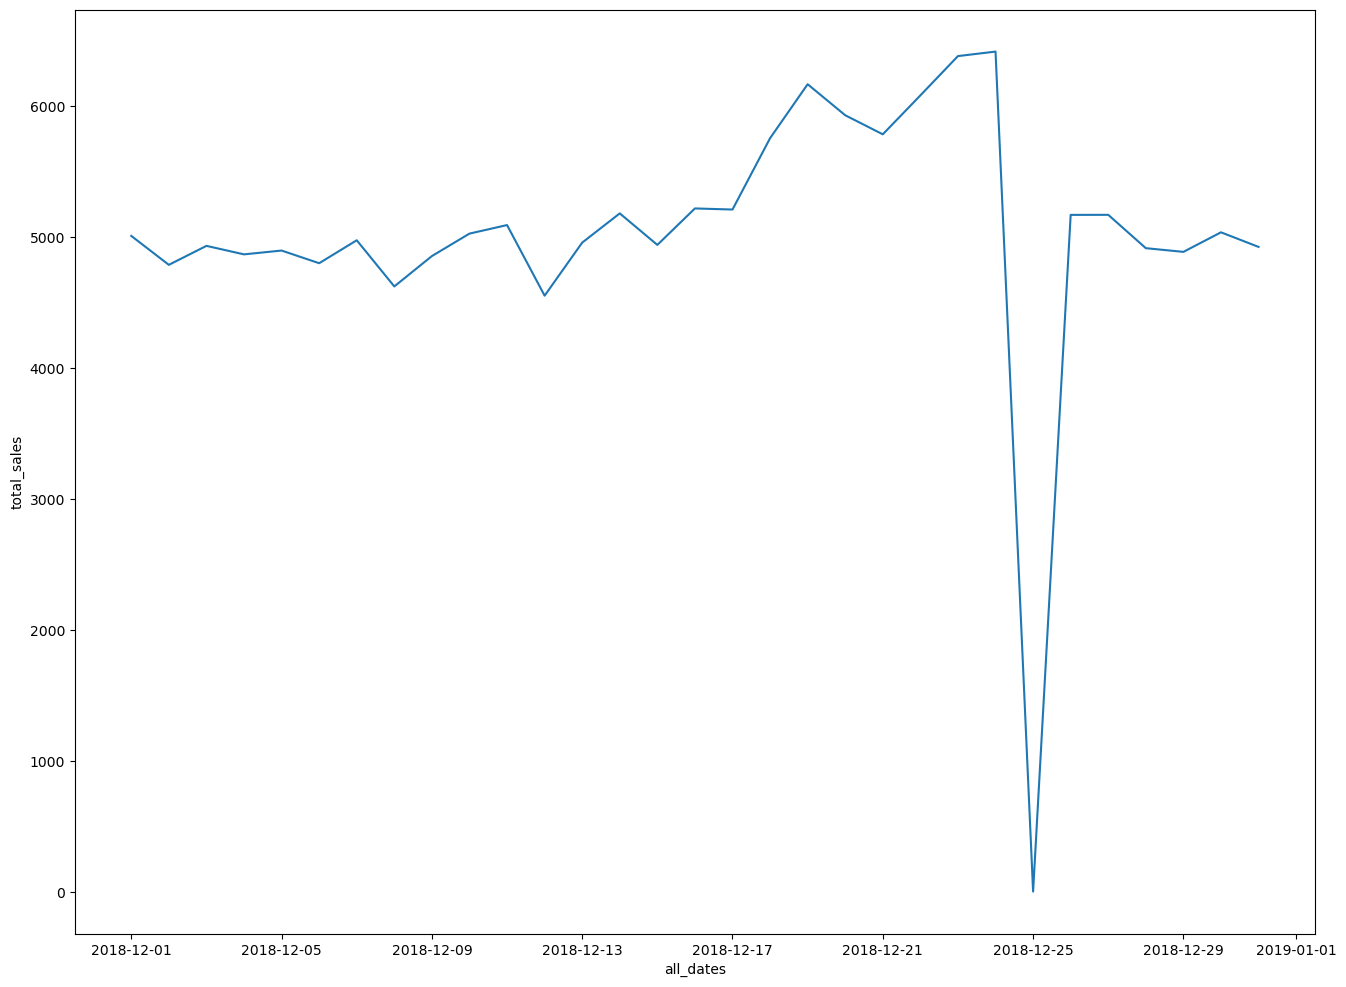

In [62]:
x = with_dates.query('"2018-11-30" <all_dates < "2019-01-01"')\
                    .groupby('all_dates', as_index=False)\
                    .agg({'total_sales': 'sum'})

sns.lineplot(x="all_dates", y="total_sales", data=x)


## We can see that there is an increase in purchases in December and a break in late December. We can see that the increase in sales occurs in the lead-up to Christmas and that there are zero sales on Christmas day itself. This is due to shops being closed on Christmas day.

In [63]:
cons_df = with_dates

In [64]:
cons_df.weights_of_chips.astype('int64').unique()

array([175, 160, 170, 150, 330, 165, 110, 210, 180, 200, 134, 270, 220,
       125, 135, 380, 250,  90, 190,  70])

## Let's download the whole dataset for future analysis

In [65]:
cons_df.to_csv(r'outliers.csv')

## Activity of customers depending on their lifestage and let's see if the higher sales are due to there being more customers who buy chips. How many customers are in each segment?

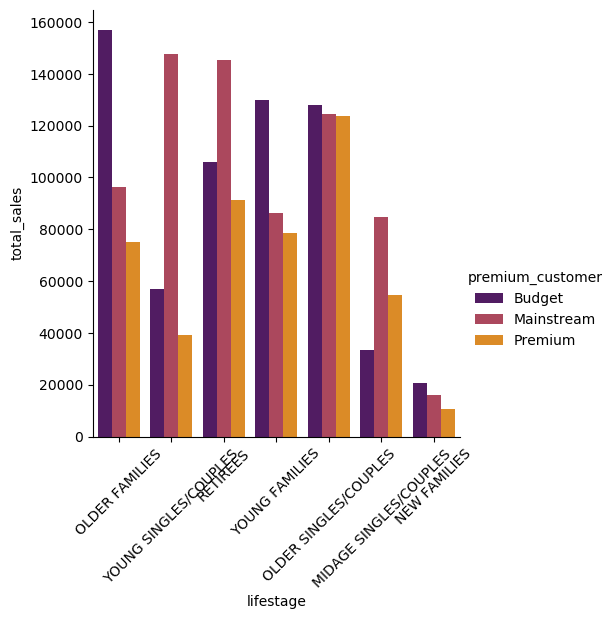

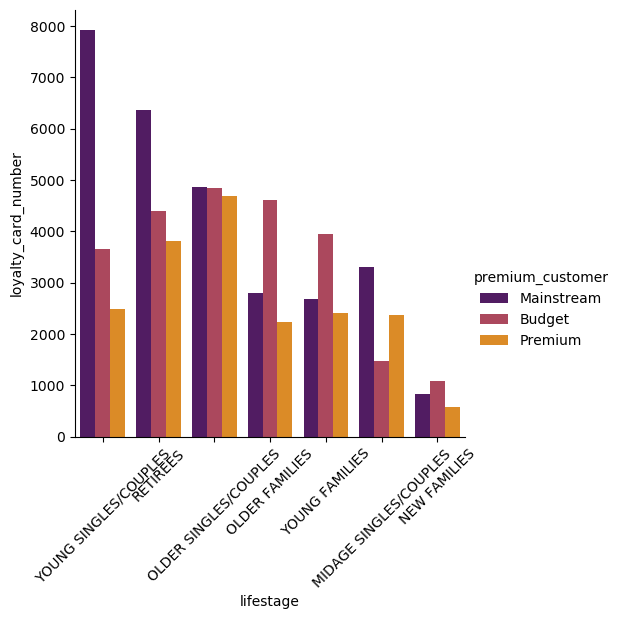

In [92]:
FileLink(r'activity_on_lifestage.png')
active_stage = cons_df.groupby(['lifestage', 'premium_customer'], as_index=False)\
                .agg({'total_sales': 'sum'})\
                .sort_values(by='total_sales', ascending=False)
activity_on_lifestage = sns.catplot(
                        data=active_stage, kind="bar",
                        x="lifestage", y="total_sales", hue="premium_customer",
                        errorbar="sd", palette="inferno")
plt.xticks(rotation=45)
plt.savefig('activity_on_lifestage.png', bbox_inches = 'tight')
FileLink(r'cust_per_segment.png')
cust_per_segment = cons_df.groupby(['lifestage','premium_customer'], as_index=False)\
                .agg({'loyalty_card_number': 'nunique'})\
                .sort_values(by='loyalty_card_number', ascending=False)

cust_per_segment_plot = sns.catplot(
                        data=cust_per_segment, kind="bar",
                        x="lifestage", y="loyalty_card_number", hue="premium_customer",
                        errorbar="sd", palette="inferno")

plt.xticks(rotation=45)
plt.savefig('cust_per_segment_plot.png', bbox_inches = 'tight')

## There are more Mainstream - young singles/couples and Mainstream - retirees who buy chips. This contributes to there being more sales to these customer segments but this is not a major driver for the Budget - Older families segment. 

## Most popular size of pack.

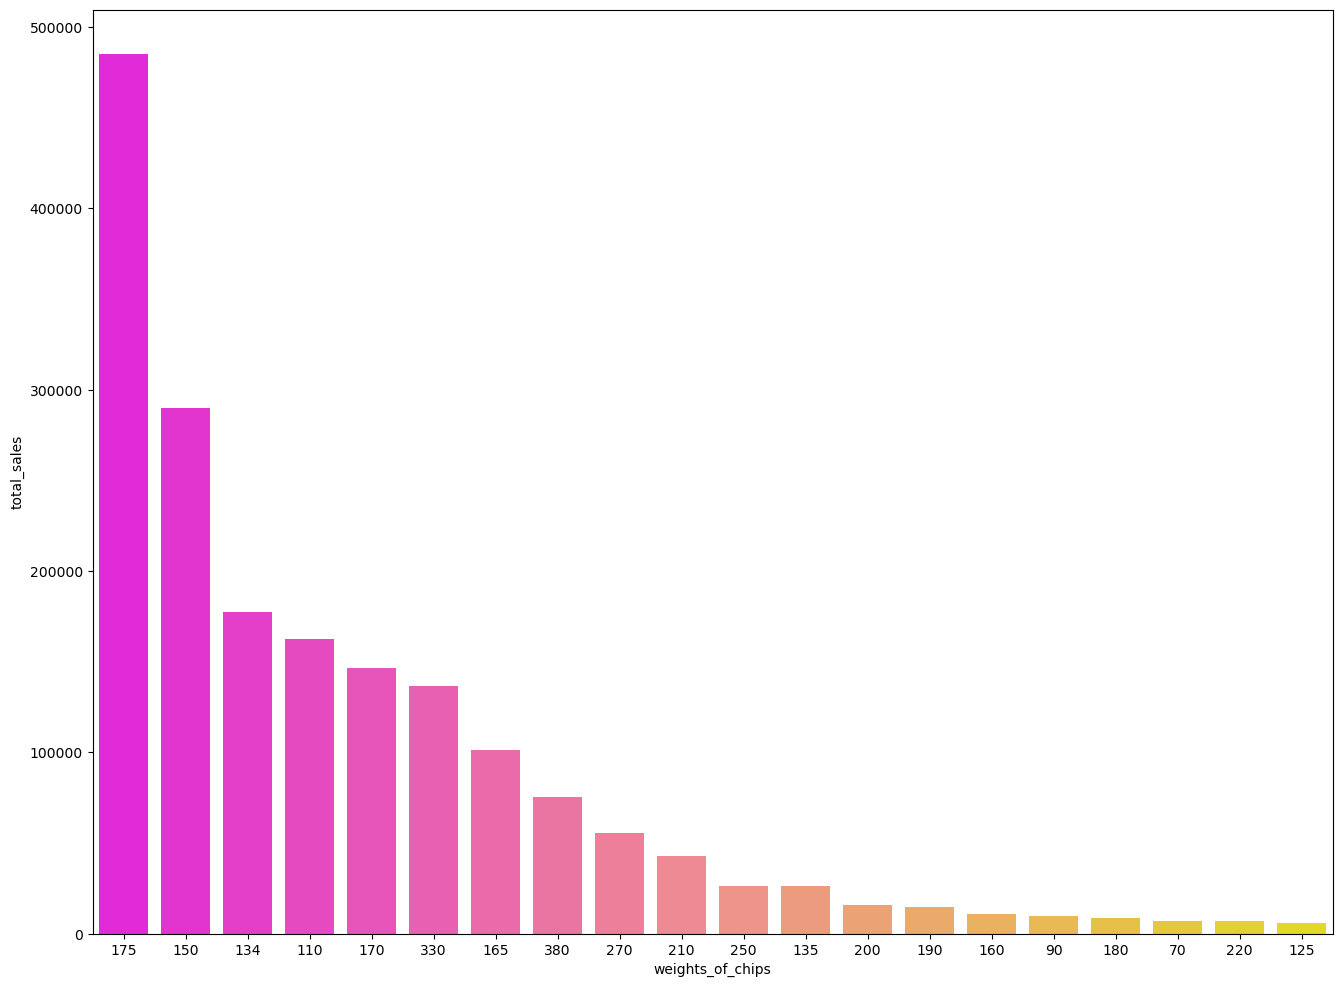

In [67]:
FileLink(r'popular_package.png')
popular_package = cons_df.groupby('weights_of_chips', as_index=False)\
                .agg({'total_sales': 'sum'})\
                .sort_values(by='total_sales', ascending=False)\
                .head(20)
popular_package = sns.barplot(data = popular_package, x='weights_of_chips', y='total_sales', palette="spring")
plt.savefig('popular_package.png')

## Average number of units per customer by LIFESTAGE and PREMIUM_CUSTOMER

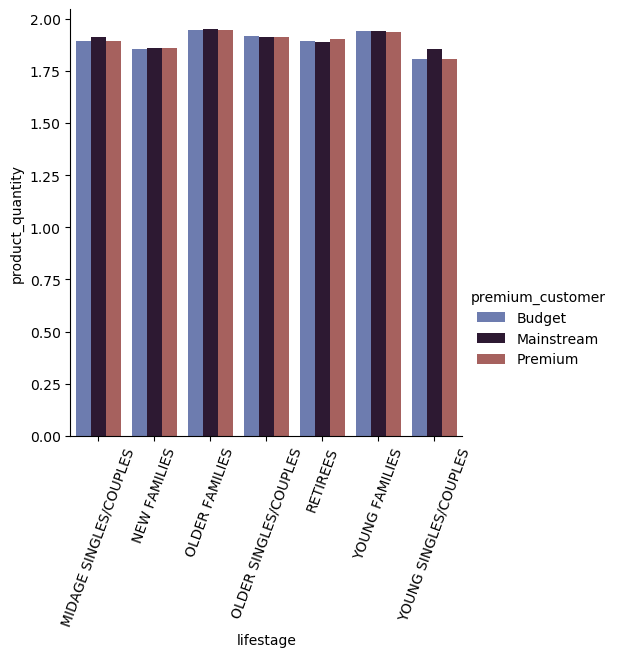

In [93]:
FileLink(r'average_units.png')
average_units = cons_df.groupby(['lifestage','premium_customer'], as_index=False)\
                .agg({'product_quantity': 'mean'})

average_units = sns.catplot(
                        data=average_units, kind="bar",
                        x="lifestage", y="product_quantity", hue="premium_customer",
                        errorbar="sd", palette="twilight")

plt.xticks(rotation=70)
plt.savefig('average_units.png', bbox_inches = 'tight')

## Older families and young families in general buy more chips per customer

## Average price per unit by LIFESTAGE and PREMIUM_CUSTOMER

In [69]:
cons_df['average_price'] = cons_df.total_sales/cons_df.product_quantity

In [70]:
cons_df.average_price.describe()

count    246740.000000
mean          3.832416
std           1.077801
min           1.320000
25%           3.000000
50%           3.800000
75%           4.600000
max           6.500000
Name: average_price, dtype: float64

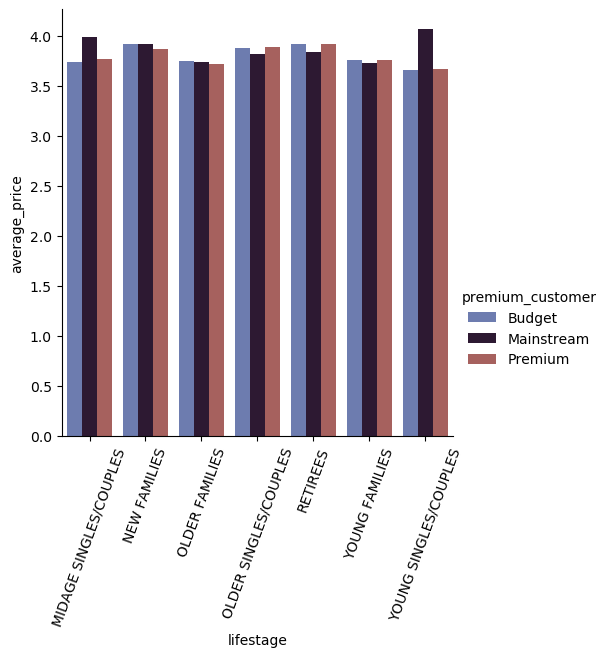

In [94]:
FileLink(r'average_unit_price.png')
average_unit_price = cons_df.groupby(['lifestage','premium_customer'], as_index=False)\
                .agg({'average_price': 'mean'})

average_unit_price_plot = sns.catplot(
                        data=average_unit_price, kind="bar",
                        x="lifestage", y="average_price", hue="premium_customer",
                        errorbar="sd", palette="twilight")

plt.xticks(rotation=70)
plt.savefig('average_unit_price_plot.png', bbox_inches = 'tight')

## "Mainstream midage" and "mainstream young singles and couples" are more willing to pay more per packet of chips compared to their budget and premium counterparts. This may be due to premium shoppers being more likely to buy healthy snacks and when they buy chips, this is mainly for entertainment purposes rather than their own consumption. This is also supported by there being fewer premium midage and young singles and couples buying chips compared to their mainstream counterparts.

## As the difference in average price per unit isn't large, we can check if this difference is statistically different. Let's perform a t-test to see if the difference is significant.  Perform an independent t-test between mainstream vs premium and budget midage and young singles and couples.

In [72]:
from scipy.stats import ttest_ind

In [73]:
t_test = ttest_ind(cons_df.query('(lifestage == "MIDAGE SINGLES/COUPLES" or lifestage =="YOUNG SINGLES/COUPLES")\
                            and premium_customer == "Mainstream"').average_price, 
        cons_df.query('(lifestage == "MIDAGE SINGLES/COUPLES" or lifestage =="YOUNG SINGLES/COUPLES") \
                            and premium_customer != "Mainstream"').average_price)
t_test

Ttest_indResult(statistic=37.83196107667825, pvalue=2.235645611540966e-309)

In [74]:
cons_df.query('(lifestage == "MIDAGE SINGLES/COUPLES" or lifestage =="YOUNG SINGLES/COUPLES")\
                            and premium_customer == "Mainstream"').average_price.mean()

4.039785893795489

In [75]:
cons_df.query('(lifestage == "MIDAGE SINGLES/COUPLES" or lifestage =="YOUNG SINGLES/COUPLES") \
                            and premium_customer != "Mainstream"').average_price.mean()

3.706491319964082

## The t-test results in a p-value of 2.235645611540966e-309 i.e. the unit price for mainstream young and mainstream mid-age singles and couples ARE statistically significantly higher than that of budget or premium, young and midage singles and couples.


## We might want to target customer segments that contribute the most to sales to retain them or further increase sales. Let's look at Mainstream - young singles/couples. For instance, let's find out if they tend to buy a particular brand of chips.

In [76]:
target_group = cons_df\
                .query('lifestage == "YOUNG SINGLES/COUPLES" and premium_customer == "Mainstream"')



In [77]:

other_groups = cons_df\
                    .query('lifestage != "YOUNG SINGLES/COUPLES" and premium_customer != "Mainstream"')


In [78]:
target_group_quantity = target_group.product_quantity.sum()
other_groups_quantity = other_groups.product_quantity.sum()

In [79]:
affinity_target = target_group.groupby('company_name', as_index=False).agg({'product_quantity': 'sum'})
affinity_target['affinity_target'] = affinity_target.product_quantity/target_group_quantity


In [80]:
affinity_other = other_groups.groupby('company_name', as_index=False).agg({'product_quantity': 'sum'})

In [81]:

affinity_other['affinity_other'] = affinity_other.product_quantity/other_groups_quantity


In [82]:
merged_df = affinity_target.merge(affinity_other, on='company_name')

In [83]:

merged_df['affinitytobrand'] = merged_df.affinity_target/merged_df.affinity_other
merged_df.sort_values(by='affinitytobrand', ascending=False)

,company_name,product_quantity_x,affinity_target,product_quantity_y,affinity_other,affinitytobrand
24,Tyrrells,1143.0,0.031553,6777.0,0.025715,1.227025
5,Dorito,569.0,0.015707,3389.0,0.012859,1.221477
23,Twisties,1673.0,0.046184,9997.0,0.037933,1.217506
6,Doritos,3878.0,0.107053,23274.0,0.088312,1.212220
12,Kettle,7172.0,0.197985,43896.0,0.166560,1.188667
11,Infzns,541.0,0.014934,3313.0,0.012571,1.188011
22,Tostitos,1645.0,0.045411,10107.0,0.038350,1.184100
15,Pringles,4326.0,0.119420,26647.0,0.101110,1.181090
8,Grain,1055.0,0.029124,6560.0,0.024891,1.170020
4,Cobs,1617.0,0.044638,10133.0,0.038449,1.160959


We can see that :
• Mainstream young singles/couples are 23% more likely to purchase Tyrrells chips compared to the
rest of the population
• Mainstream young singles/couples are 56% less likely to purchase Burger Rings compared to the rest
of the population

## Let’s also find out if our target segment tends to buy larger packs of chips.

In [84]:
affinity_target_weights = target_group.groupby('weights_of_chips', as_index=False)\
                        .agg({'product_quantity': 'sum'})
affinity_target_weights['affinity_target_weights'] = affinity_target_weights.\
                        product_quantity/target_group_quantity

In [85]:
affinity_other_weights = other_groups.groupby('weights_of_chips', as_index=False)\
                        .agg({'product_quantity': 'sum'})
affinity_other_weights['affinity_other_weights'] = affinity_other_weights.\
                        product_quantity/other_groups_quantity

In [86]:
merged_df_weights = affinity_target_weights.merge(affinity_other_weights, on='weights_of_chips')
merged_df_weights['affinitytosize'] = merged_df_weights\
                                    .affinity_target_weights/merged_df_weights.affinity_other_weights
merged_df_weights.sort_values(by='affinitytosize', ascending=False)

,weights_of_chips,product_quantity_x,affinity_target_weights,product_quantity_y,affinity_other_weights,affinitytosize
15,270,1153.0,0.031829,6607.0,0.025070,1.269608
17,380,1165.0,0.032160,6776.0,0.025711,1.250827
16,330,2220.0,0.061284,13434.0,0.050974,1.202243
0,110,3850.0,0.106280,23607.0,0.089575,1.186492
2,134,4326.0,0.119420,26647.0,0.101110,1.181090
12,210,1055.0,0.029124,6560.0,0.024891,1.170020
3,135,535.0,0.014769,3408.0,0.012931,1.142086
14,250,520.0,0.014355,3390.0,0.012863,1.115959
7,170,2926.0,0.080773,21175.0,0.080347,1.005300
4,150,5709.0,0.157598,42976.0,0.163070,0.966449


## It looks like Mainstream young singles/couples are 27% more likely to purchase a 270g pack of chips compared to the rest of the population but let’s dive into what brands sell this pack size.|

In [87]:
cons_df.query('weights_of_chips == "270"')

,transaction_date,store_number,loyalty_card_number,tax_ID,product_number,product_name,product_quantity,total_sales,weights_of_chips,company_name,lifestage,premium_customer,day_of_week,all_dates,average_price
34,2019-05-18,9.0,9208,8634.0,15.0,Twisties Cheese,2.0,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,Saturday,2018-08-04,4.6
79,2018-08-24,39.0,39167,35639.0,113.0,Twisties Chicken,2.0,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,Friday,2018-09-18,4.6
125,2019-05-06,54.0,54305,48304.0,15.0,Twisties Cheese,2.0,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,Monday,2018-11-03,4.6
132,2019-05-20,55.0,55073,48887.0,113.0,Twisties Chicken,1.0,4.6,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,Monday,2018-11-10,4.6
209,2019-01-01,80.0,80182,78980.0,15.0,Twisties Cheese,2.0,9.2,270,Twisties,MIDAGE SINGLES/COUPLES,Budget,Tuesday,2019-01-26,4.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246488,2018-07-27,259.0,259034,257623.0,113.0,Twisties Chicken,2.0,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,Friday,2018-07-27,4.6
246521,2018-10-13,261.0,261110,260183.0,15.0,Twisties Cheese,2.0,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,Saturday,2018-10-13,4.6
246633,2019-04-04,266.0,266095,263934.0,113.0,Twisties Chicken,1.0,4.6,270,Twisties,YOUNG SINGLES/COUPLES,Premium,Thursday,2019-04-04,4.6
246655,2019-03-29,266.0,266420,264256.0,15.0,Twisties Cheese,2.0,9.2,270,Twisties,YOUNG SINGLES/COUPLES,Premium,Friday,2019-03-29,4.6


## Twisties are the only brand offering 270g packs and so this may instead be reflecting a higher likelihood of purchasing Twisties.

Conclusion
Let’s recap what we’ve found!
Sales have mainly been due to Budget - older families, Mainstream - young singles/couples, and Mainstream
- retirees shoppers. We found that the high spend in chips for mainstream young singles/couples and retirees is due to there being more of them than other buyers. Mainstream, midage and young singles and
couples are also more likely to pay more per packet of chips. This is indicative of impulse buying behaviour.
We’ve also found that Mainstream young singles and couples are 23% more likely to purchase Tyrrells chips
compared to the rest of the population. The Category Manager may want to increase the category’s performance by off-locating some Tyrrells and smaller packs of chips in discretionary space near segments
where young singles and couples frequent more often to increase visibilty and impulse behaviour.
Quantium can help the Category Manager with recommendations of where these segments are and further
help them with measuring the impact of the changed placement. We’ll work on measuring the impact of
trials in the next task and putting all these together in the third task.

In [88]:
#!pip install nbconvert[webpdf]

In [89]:
#!jupyter nbconvert --to webpdf --allow-chromium-download your-notebook-file.ipynb

In [90]:
#!jupyter nbconvert --to webpdf --allow-chromium-download quantium.ipynb